In [1]:
using DelimitedFiles
using StatsBase
using Statistics
using Plots; gr();

In [2]:
path = "../data/base/rejection_test_vpvpvs"
ign, h = readdlm("$(path[1:findlast("/",path)[1]])bsr_ignmajors_1.csv", ',', header=true)
log = read("$path/crust_data.log", String);

In [3]:
function arrayparser(s) 
    parsed = zeros(1000*595, 10)
    for (i, line) in enumerate(split(s, ";"))
        for (j, num) in enumerate(split(line))
            parsed[i,j] = parse(Float64, num)
        end
    end
    return parsed
end

arrayparser (generic function with 1 method)

In [4]:
upper = arrayparser(split(split(split(log, "=")[2], "\n")[1], r"\[|\]")[2])
mid = arrayparser(split(split(split(log, "=")[3], "\n")[1], r"\[|\]")[2])
lower = arrayparser(split(split(split(log, "=")[4], "\n")[1], r"\[|\]")[2]);

In [5]:
println(mean(upper[:,1]))
println(mean(mid[:,1]))
println(mean(lower[:,1]))

66.61599293845379
63.492891928369744
53.38534417337815


In [6]:
######## Look at upper, middle, or lower 
assigned = mid
res, h = readdlm("$path/results-upper.csv",',', header=true);

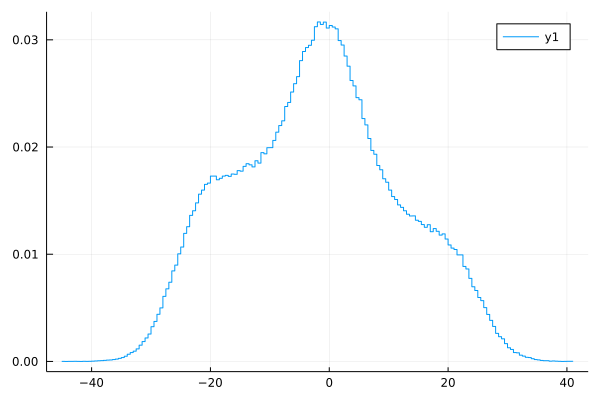

In [7]:
stephist(res[:,10] .- assigned[:,1], normalize=:pdf)

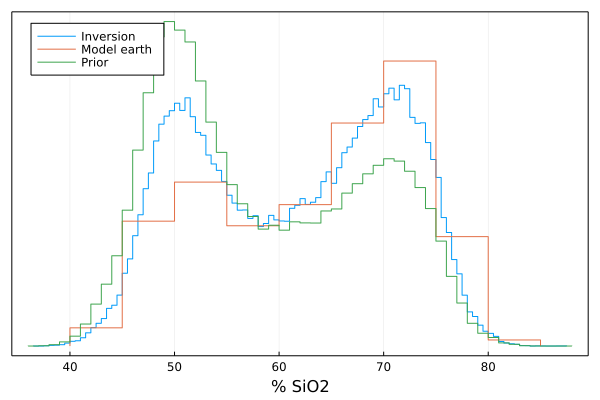

In [8]:
stephist(res[:,10], normalize=:pdf, label="Inversion", 
    framestyle=:box, yticks=false, legend=:topleft, xlabel="% SiO2")
stephist!(assigned[:,1], normalize=:pdf, label="Model earth", nbins=20)
stephist!(ign[:,2], normalize=:pdf, label="Prior")

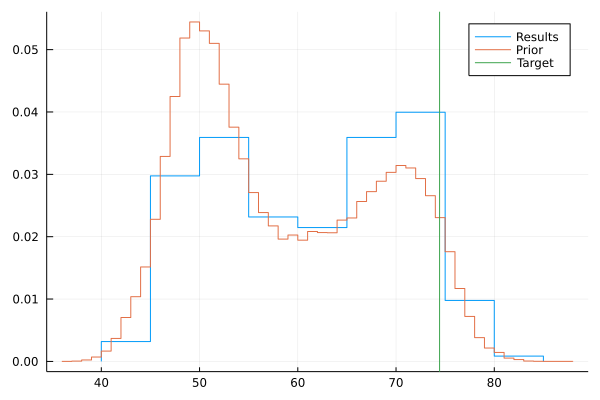

In [13]:
comps = unique(assigned[:,1])

i = 100
stephist(res[assigned[:,1] .== comps[i],10], label="Results", normalize=:pdf)
stephist!(ign[:,2], label="Prior", normalize=:pdf)
vline!([comps[i]], label="Target")

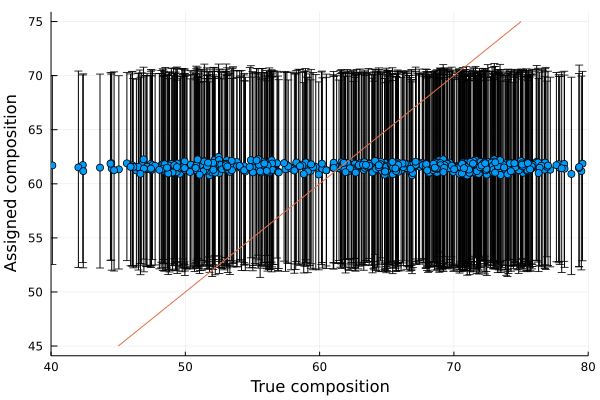

In [14]:
window = 25
mean_results = zeros(length(comps))
lower_er = zeros(length(comps))
upper_er = zeros(length(comps))
for (c, comp) in enumerate(comps)
    si_inverted = res[assigned[:,1].==comp,10]
    si_inverted = si_inverted[.! isnan.(si_inverted)]
    mean_results[c] = mean(si_inverted)
    lower_er[c] = percentile(si_inverted, window)
    upper_er[c] = percentile(si_inverted, 100-window)
end
scatter(comps, mean_results, 
    yerr = (mean_results .- lower_er, upper_er .- mean_results),
    ylabel="Assigned composition", xlabel="True composition",
    legend=false)
plot!([45,75],[45,75], xlims=(40.0, 80.0))